In [1]:
#Uncomment below if you need this package
#!pip install pandas_ta

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_ta
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
#Uncomment for local file
#url = "TSLA.csv"

#Web download of TSLA.csv
url = "https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1277769600&period2=1634774400&interval=1d&events=history&includeAdjustedClose=true"
df = pd.read_csv(url)


In [4]:
#Using date as index
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df = df[['Open', 'High','Low','Close']]

In [5]:
#Checking data
df.head(10)

,Open,High,Low,Close
Date,,,,
2010-06-29,3.800,5.000,3.508,4.778
2010-06-30,5.158,6.084,4.660,4.766
2010-07-01,5.000,5.184,4.054,4.392
2010-07-02,4.600,4.620,3.742,3.840
2010-07-06,4.000,4.000,3.166,3.222
2010-07-07,3.280,3.326,2.996,3.160
2010-07-08,3.228,3.504,3.114,3.492
2010-07-09,3.516,3.580,3.310,3.480
2010-07-12,3.590,3.614,3.400,3.410


<AxesSubplot:xlabel='Date'>

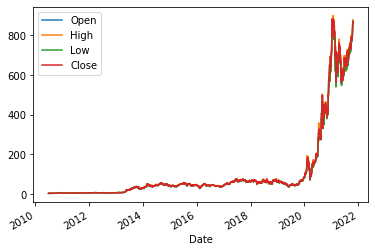

In [6]:
#Checking data plotted
df.plot()

In [7]:
#Calculating Exponential Moving Average based on the last 10 days. Nice feature in stock prediction
df.ta.ema(close='Close', lenght=10, append=True)


Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2021-10-14    795.668213
2021-10-15    804.279453
2021-10-18    816.248640
2021-10-19    824.979800
2021-10-20    832.401653
Name: EMA_10, Length: 2849, dtype: float64

In [8]:
df.head(20)

,Open,High,Low,Close,EMA_10
Date,,,,,
2010-06-29,3.800,5.000,3.508,4.778,NaN
2010-06-30,5.158,6.084,4.660,4.766,NaN
2010-07-01,5.000,5.184,4.054,4.392,NaN
2010-07-02,4.600,4.620,3.742,3.840,NaN
2010-07-06,4.000,4.000,3.166,3.222,NaN
2010-07-07,3.280,3.326,2.996,3.160,NaN
2010-07-08,3.228,3.504,3.114,3.492,NaN
2010-07-09,3.516,3.580,3.310,3.480,NaN
2010-07-12,3.590,3.614,3.400,3.410,NaN


In [9]:
#Removing NAN values because of our data, because the average could not be calculated without 10 days of previous data
df.dropna(inplace = True);

In [10]:
#Check if it worked
df.head()

,Open,High,Low,Close,EMA_10
Date,,,,,
2010-07-13,3.478,3.728,3.380,3.628,3.816800
2010-07-14,3.588,4.030,3.552,3.968,3.844291
2010-07-15,3.988,4.300,3.800,3.978,3.868602
2010-07-16,4.140,4.260,4.010,4.128,3.915765
2010-07-19,4.274,4.450,4.184,4.382,4.000535


In [11]:
#defining x and y for splitting, training and testing
X = df[['Open', 'High','Low','EMA_10']]
y = df[['Close']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train)

                  Open        High         Low      EMA_10
Date                                                      
2012-06-19    6.404000    6.532000    6.300000    6.065436
2018-10-02   62.790001   63.368000   59.830002   59.525395
2017-05-12   65.096001   65.400002   64.306000   63.382219
2013-04-10    8.140000    8.402000    8.122000    8.172795
2020-09-21  453.130005  455.679993  407.070007  425.197330
...                ...         ...         ...         ...
2017-01-12   45.812000   46.139999   45.116001   45.020345
2014-11-14   50.000000   51.770000   49.700001   49.356189
2015-01-07   42.669998   42.956001   41.956001   43.265126
2015-09-01   48.068001   49.200001   47.394001   48.060401
2013-12-10   28.010000   29.174000   27.972000   27.320218

[1902 rows x 4 columns]


In [12]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

In [13]:
print("Prediction compared to training data")
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

Prediction compared to training data
MSE = 6.809266655349755


In [14]:
Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
print("Prediction compared to test data")
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

Prediction compared to test data
MSE = 8.334485282252432


In [15]:
#Input dato
dato ='2020-10-20'

try:
    #Finding index for chosen date
    i = df.index.get_loc(dato)
    
    #Finding day before to predict closing price on chosen date
    dfDato = df.iloc[[i-1]]
    predictionDate = dfDato[['Open', 'High','Low','EMA_10']]

    actualPrice = df.iloc[i]['Close']
    prediction = linear_regressor.predict(predictionDate)
    predPrice = prediction[0][0]

    percentage = (predPrice/actualPrice)*100

    #Output prediction
    print('Predicted price on date ' + str(dato) + ": " + str(predPrice))
    print('Actual price on date '+ str(dato) + ": " + str(actualPrice))
    print('Percentage of actual price: ' + str(percentage))
        
except:
    #Could not see from the assignment if we should predict into the future, as we can not check the actual price in the future.
    print('ERROR: This could be a weekend or future') 



Predicted price on date 2020-10-20: 433.17759085925195
Actual price on date 2020-10-20: 421.940002
Percentage of actual price: 102.66331440631029
